# Preparing Data with Wavelet

In [32]:
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import os
import numpy as np 
from os import walk
from PIL import Image
from matplotlib.pyplot import imread
import numpy as np
import pywt
import cv2

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files

In [1]:
files.upload()

NameError: name 'files' is not defined

In [8]:
!mkdir ~/.kaggle/

mkdir: /Users/sultanbeishenkulov/.kaggle/: File exists


In [9]:
! cp kaggle.json ~/.kaggle/

cp: kaggle.json: No such file or directory


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: /Users/sultanbeishenkulov/.kaggle/kaggle.json: No such file or directory


In [6]:
!kaggle datasets download -d tongpython/cat-and-dog

Traceback (most recent call last):
  File "/Users/sultanbeishenkulov/opt/anaconda3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/sultanbeishenkulov/opt/anaconda3/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/Users/sultanbeishenkulov/opt/anaconda3/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /Users/sultanbeishenkulov/.kaggle. Or use the environment method.


In [7]:
!unzip '/content/cat-and-dog.zip'

unzip:  cannot find or open /content/cat-and-dog.zip, /content/cat-and-dog.zip.zip or /content/cat-and-dog.zip.ZIP.


In [34]:
if not os.path.exists(os.path.join('DATA_WITH_wavelet','training_set','dogs')):

    os.makedirs(os.path.join('DATA_WITH_wavelet','training_set','dogs'))
    os.makedirs(os.path.join('DATA_WITH_wavelet','training_set','cats'))

In [35]:
def w2d(img, mode='haar', level=1):
    imArray = cv2.imread(img)
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    #Display result
    return imArray_H

In [36]:
os.remove("/content/training_set/training_set/dogs/_DS_Store")
os.remove("/content/training_set/training_set/cats/_DS_Store")

In [37]:
_, _, filenames_dog = next(walk('/content/training_set/training_set/dogs'))
_, _, filenames_cat = next(walk('/content/training_set/training_set/cats'))

In [38]:

image=w2d("/content/training_set/training_set/cats/cat.1.jpg",'db1',10)
cv2.imwrite('./hello.jpg',image)

/usr/local/lib/python3.6/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


True

In [39]:
for image in filenames_dog:
  im_arr=w2d("/content/training_set/training_set/dogs/"+image,'db1',10)
  cv2.imwrite("/content/DATA_WITH_wavelet/training_set/dogs/"+image[:-4]+".jpg",im_arr)


/usr/local/lib/python3.6/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [40]:
for image in filenames_cat:
  im_arr=w2d("/content/training_set/training_set/cats/"+image,'db1',10)
  cv2.imwrite("/content/DATA_WITH_wavelet/training_set/cats/"+image[:-4]+".jpg",im_arr)

/usr/local/lib/python3.6/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


# Modeling Without Wavelet

In [44]:
import warnings
warnings.filterwarnings('ignore')

# Setting up our enviroment
# Data Viz & Regular Expression Libraries :
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Import FastAI library 
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [45]:
x  = '/content/training_set/training_set'
path = Path(x)
path.ls()

[PosixPath('/content/training_set/training_set/dogs'),
 PosixPath('/content/training_set/training_set/cats')]

In [46]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

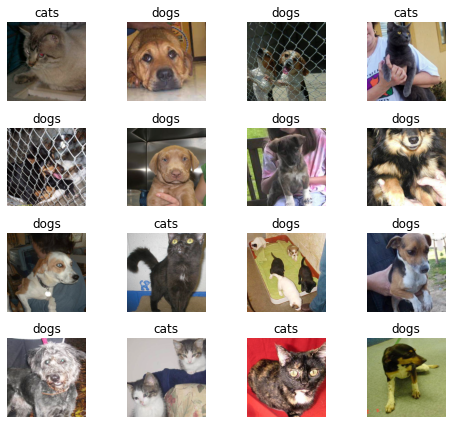

In [47]:
data.show_batch(rows=4, figsize=(7,6),recompute_scale_factor=True)

In [48]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy],path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [49]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.544110,0.494642,0.953154,01:35
1,0.364273,0.227000,0.967520,01:35
2,0.136456,0.078690,0.977514,01:35
3,0.061703,0.042836,0.982511,01:34


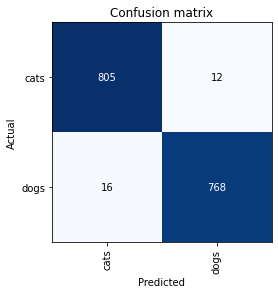

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

**Prediction using trained model**

cats


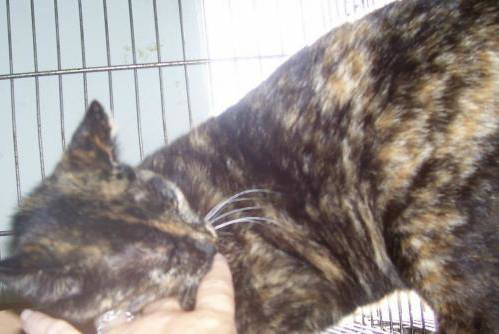

In [53]:
img = open_image('/content/test_set/test_set/cats/cat.4006.jpg')
print(learn.predict(img)[0])
img

# With PCA

In [54]:
x  = '/content/DATA_WITH_wavelet/training_set'
path = Path(x)
path.ls()

[PosixPath('/content/DATA_WITH_wavelet/training_set/dogs'),
 PosixPath('/content/DATA_WITH_wavelet/training_set/cats')]

In [55]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

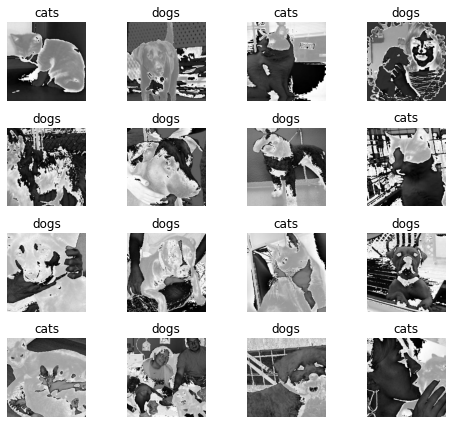

In [56]:
data.show_batch(rows=4, figsize=(7,6),recompute_scale_factor=True)

In [57]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy],path = Path("."))

In [58]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.612199,0.650613,0.832605,01:29
1,0.340044,0.435036,0.901936,01:29
2,0.185748,0.127662,0.947533,01:30
3,0.124955,0.116650,0.952530,01:29


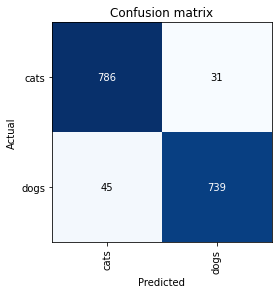

In [59]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

**Interpretation:**
1. We noticed that model without applying Wavelet transform was better in term of accuracy and logloss.
2. In term of time Wavelet was the faster .